In [23]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import pandas as pd
from sklearn.model_selection import train_test_split
import os
os.chdir('/content/drive/MyDrive/Tensorflow Advance/Practice/Alphabet')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import random
import string

print("Version of tensorflow is : ",tf.__version__)

Version of tensorflow is :  2.3.0


In [24]:
df = pd.read_csv("data.csv")
df.head()
class_name = string.ascii_uppercase

In [38]:
data  = df.drop('0' , axis = 1).astype('float32')
label = df['0']

In [39]:
print("Shape of data : ",data.shape)
print("Shape of label : ",label.shape)

Shape of data :  (372450, 784)
Shape of label :  (372450,)


In [40]:
def plot_alpha():
    r = random.randint(0 , data.shape[0])
    plt.imshow(data.loc[r].values.reshape((28,28)))
    plt.title(class_name[label.loc[r]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

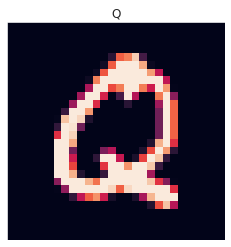

In [41]:
plot_alpha()

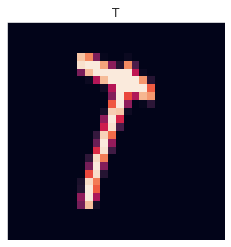

In [42]:
plot_alpha()

In [43]:
data  = data.values
label = label.values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data , label, test_size=0.2)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [46]:
print("Shape of data : " , data.shape)
print("Shape of label : " , label.shape)

Shape of data :  (372450, 784)
Shape of label :  (372450,)


In [56]:
X_train = X_train.reshape((X_train.shape[0] , 28 , 28 , 1))
X_test = X_test.reshape((X_test.shape[0] , 28 , 28 , 1))

In [60]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [61]:
print("Shape of X_train : ",X_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of X_test  : ",X_test.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (297960, 28, 28, 1)
Shape of y_train :  (297960, 26)
Shape of X_test  :  (74490, 28, 28, 1)
Shape of y_test  :  (74490, 26)


In [66]:
def get_base_model():
    #input = tf.keras.layers.Input(shape = (28,28,1))
    #x = tf.keras.layers.Dense(64 , activation=tf.nn.relu)(input)
    #x = tf.keras.layers.MaxPool2D((2,2))(x)
    #x = tf.keras.layers.Dense(128 , activation=tf.nn.relu)(x)
    #x = tf.keras.layers.MaxPool2D((2,2))(x)

    #x = tf.keras.layers.Flatten()(x)
    #x = tf.keras.layers.Dense(256 , activation=tf.nn.relu)(x)
    #x = tf.keras.layers.Dense(26 , activation=tf.nn.sigmoid)(x)

    #model = tf.keras.Model(inputs = input ,outputs = x)
    #model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001) ,
                  #loss = tf.keras.losses.categorical_crossentropy , metrics = ['acc'])
    #return model

    cls = Sequential()
    cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    cls.add(MaxPooling2D(pool_size=(2, 2)))
    cls.add(Dropout(0.3))
    cls.add(Flatten())
    cls.add(Dense(128, activation='relu'))
    cls.add(Dense(26, activation='softmax'))

    cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cls

In [67]:
model1 = get_base_model()
#model.summary()
history_model1 = model1.fit(X_train , y_train , batch_size=256 , epochs=20 , validation_data=(X_test , y_test))

Epoch 1/20
1164/1164 [==============================] - 6s 5ms/step - loss: 0.2378 - accuracy: 0.9344 - val_loss: 0.0920 - val_accuracy: 0.9753
Epoch 2/20
1164/1164 [==============================] - 6s 5ms/step - loss: 0.0894 - accuracy: 0.9747 - val_loss: 0.0686 - val_accuracy: 0.9814
Epoch 3/20
1164/1164 [==============================] - 6s 5ms/step - loss: 0.0670 - accuracy: 0.9810 - val_loss: 0.0582 - val_accuracy: 0.9833
Epoch 4/20
1164/1164 [==============================] - 6s 5ms/step - loss: 0.0533 - accuracy: 0.9847 - val_loss: 0.0483 - val_accuracy: 0.9867
Epoch 5/20
1164/1164 [==============================] - 6s 5ms/step - loss: 0.0444 - accuracy: 0.9868 - val_loss: 0.0436 - val_accuracy: 0.9878
Epoch 6/20
1164/1164 [==============================] - 6s 5ms/step - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.0385 - val_accuracy: 0.9896
Epoch 7/20
1164/1164 [==============================] - 6s 5ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0367 - val_accuracy:

In [69]:
!pip install tensorflowjs
import tensorflowjs as tfjs

     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 112kB 22.2MB/s 
  Found existing installation: tensorflow-hub 0.10.0
    Uninstalling tensorflow-hub-0.10.0:
      Successfully uninstalled tensorflow-hub-0.10.0


In [70]:
tfjs.converters.save_keras_model(model1 , 'model')

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
